In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
# Dataset
nama_file = 'registrasi3.xlsx'
dataset = pd.read_excel(nama_file)
print(dataset)

     Umur  SHIFT Jenis Pasien Jenis Pemeriksaan Detil Pemeriksaan  \
0      48   PAGI         BARU               USG    ABD ATAS BAWAH   
1      54   PAGI         BARU               USG    ABD ATAS BAWAH   
2      51   PAGI         BARU           RONTGEN            THORAX   
3      53   PAGI         BARU               USG    ABD ATAS BAWAH   
4      55   PAGI         BARU               USG    ABD ATAS BAWAH   
..    ...    ...          ...               ...               ...   
110    23   SORE         BARU           RONTGEN            THORAX   
111    23   SORE         BARU           RONTGEN               BOF   
112    72  MALAM         BARU           CT SCAN            KEPALA   
113     5   SORE         BARU           RONTGEN            THORAX   
114    13  MALAM         BARU           RONTGEN            THORAX   

    Jenis Pembayaran  Waktu Tunggu   
0                IKS             24  
1                KES             24  
2                IKS             20  
3               UMU

### Ordinal to Rasio

In [3]:
# Mengubah data menjad bentuk numerik
dataset['SHIFT'].replace({'':0, 'PAGI':1, 'SORE':2, 'MALAM':3}, inplace=True)
dataset['Jenis Pasien'].replace({'':0, 'BARU':1, 'LAMA':2}, inplace=True)
dataset['Jenis Pemeriksaan'].replace({'':0, 'USG':1, 'RONTGEN':2, 'CT SCAN':3}, inplace=True)
dataset['Detil Pemeriksaan'].replace({'':0, 'ABD ATAS BAWAH':1, 'THORAX':2, 'GENU':3, 'KONTROL HAMIL':4, 'MANUS':5, 'ELBOW':6, 'THYROID':7, 'KANDUNGAN':8, 'LS':9, 'CRURIS':10, 'PEDIS':11, 'PELVIS':12, 'KEPALA':13, 'WRIST':14, 'COCCYGEUS':15, 'TVS':16, 'STONO':17, 'BOF':18}, inplace=True)
dataset['Jenis Pembayaran'].replace({'':0, 'IKS':1, 'UMUM':2, 'KES':3}, inplace=True)
dataset

,Umur,SHIFT,Jenis Pasien,Jenis Pemeriksaan,Detil Pemeriksaan,Jenis Pembayaran,Waktu Tunggu
0,48,1,1,1,1,1,24
1,54,1,1,1,1,3,24
2,51,1,1,2,2,1,20
3,53,1,1,1,1,2,23
4,55,1,1,1,1,3,23
...,...,...,...,...,...,...,...
110,23,2,1,2,2,3,32
111,23,2,1,2,18,2,28
112,72,3,1,3,13,2,44
113,5,2,1,2,2,2,36


### Missing value

In [4]:
# Mendeteksi missing value
dataset.isnull().sum()

# if dataset.isna().values.any():
#     print("Missing value:\n")
#     print(dataset.isna().any())
# else:
#     print("tidak ada missing value\n")
# print("")

Umur                 0
SHIFT                0
Jenis Pasien         0
Jenis Pemeriksaan    0
Detil Pemeriksaan    0
Jenis Pembayaran     0
Waktu Tunggu         0
dtype: int64

#### Replace missing value with mean

In [5]:
# Mengganti dataset rata-rata
mean = dataset.mean()
missingValue = dataset.fillna(mean)
missingValue

,Umur,SHIFT,Jenis Pasien,Jenis Pemeriksaan,Detil Pemeriksaan,Jenis Pembayaran,Waktu Tunggu
0,48,1,1,1,1,1,24
1,54,1,1,1,1,3,24
2,51,1,1,2,2,1,20
3,53,1,1,1,1,2,23
4,55,1,1,1,1,3,23
...,...,...,...,...,...,...,...
110,23,2,1,2,2,3,32
111,23,2,1,2,18,2,28
112,72,3,1,3,13,2,44
113,5,2,1,2,2,2,36


### Outlier

In [6]:
# Mendeteksi outlier dengan Quartiles
dataset = dataset
def outlierDetection(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    outlier = dataset[((dataset < (q1 - 1.5 * iqr)) | (dataset > (q3 + 1.5 * iqr)))]
    return outlier
print("") 

# Mendeteksi outlier
outlier = outlierDetection(missingValue)
if not outlier.empty:
    print("Outlier:\n")
    print(outlier)
else:
    print("Tidak ada outlier\n")
print("")




Outlier:

     Umur  SHIFT  Jenis Pasien  Jenis Pemeriksaan  Detil Pemeriksaan  \
0     NaN    NaN           NaN                1.0                NaN   
1     NaN    NaN           NaN                1.0                NaN   
2     NaN    NaN           NaN                NaN                NaN   
3     NaN    NaN           NaN                1.0                NaN   
4     NaN    NaN           NaN                1.0                NaN   
..    ...    ...           ...                ...                ...   
110   NaN    NaN           NaN                NaN                NaN   
111   NaN    NaN           NaN                NaN               18.0   
112   NaN    NaN           NaN                3.0               13.0   
113   NaN    NaN           NaN                NaN                NaN   
114   NaN    NaN           NaN                NaN                NaN   

     Jenis Pembayaran  Waktu Tunggu   
0                 NaN            NaN  
1                 NaN            NaN  
2      

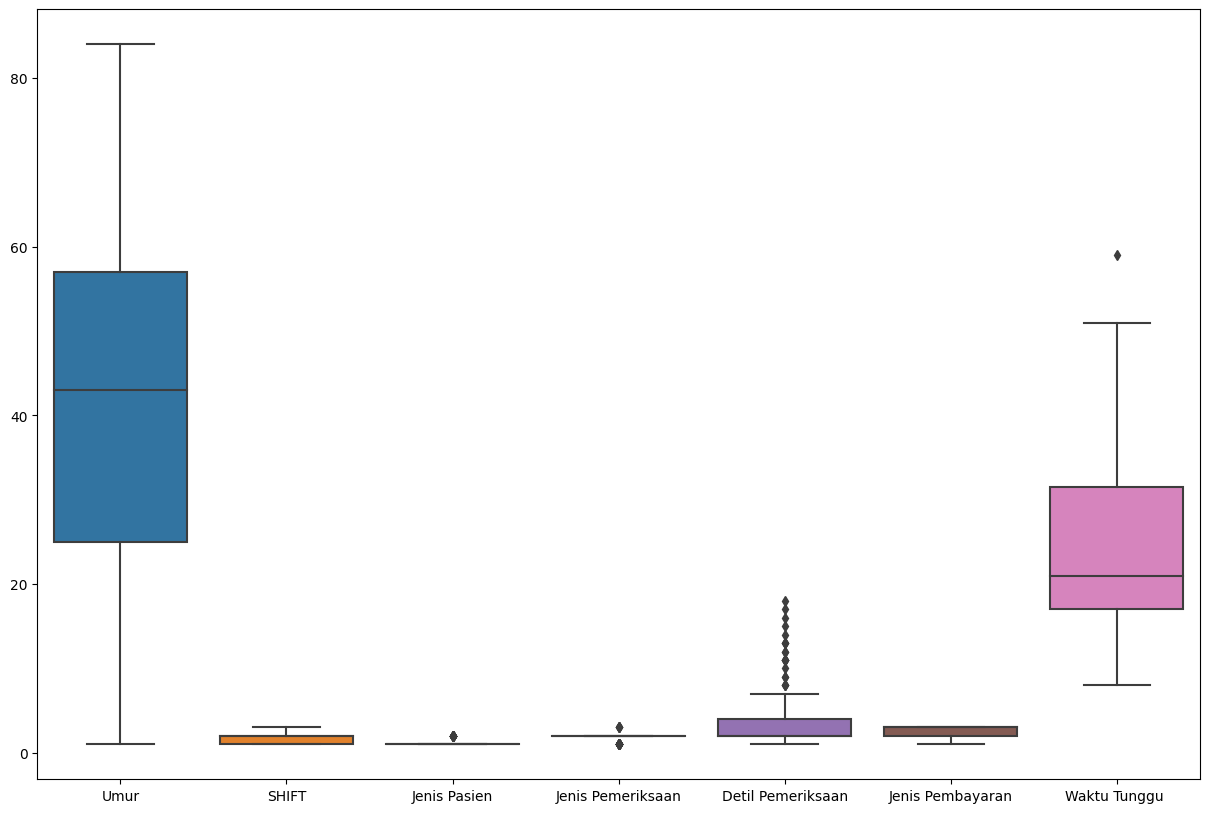

In [7]:
# Deteksi outlier dengan gambar 
plt.figure(figsize=(15, 10))  # Ukuran gambar dapat disesuaikan
sns.boxplot(dataset)
plt.show()

#### Replace outlier with mean

In [8]:
# Mengganti outlier dengan nilai mean
def outlierReplacing(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    mean = dataset[(dataset > lower_bound) & (dataset < upper_bound)].mean()
    dataset[dataset > upper_bound] = mean
    dataset[dataset < lower_bound] = mean
    return dataset
print("")

# Membuat dataframe untuk menampung hasil penggantian outlier
dataset = pd.DataFrame(dataset)
print("Replaced Outliers Data")
print(dataset.head)


Replaced Outliers Data
<bound method NDFrame.head of      Umur  SHIFT  Jenis Pasien  Jenis Pemeriksaan  Detil Pemeriksaan  \
0      48      1             1                  1                  1   
1      54      1             1                  1                  1   
2      51      1             1                  2                  2   
3      53      1             1                  1                  1   
4      55      1             1                  1                  1   
..    ...    ...           ...                ...                ...   
110    23      2             1                  2                  2   
111    23      2             1                  2                 18   
112    72      3             1                  3                 13   
113     5      2             1                  2                  2   
114    13      3             1                  2                  2   

     Jenis Pembayaran  Waktu Tunggu   
0                   1             24  
1  

### Scatterplot

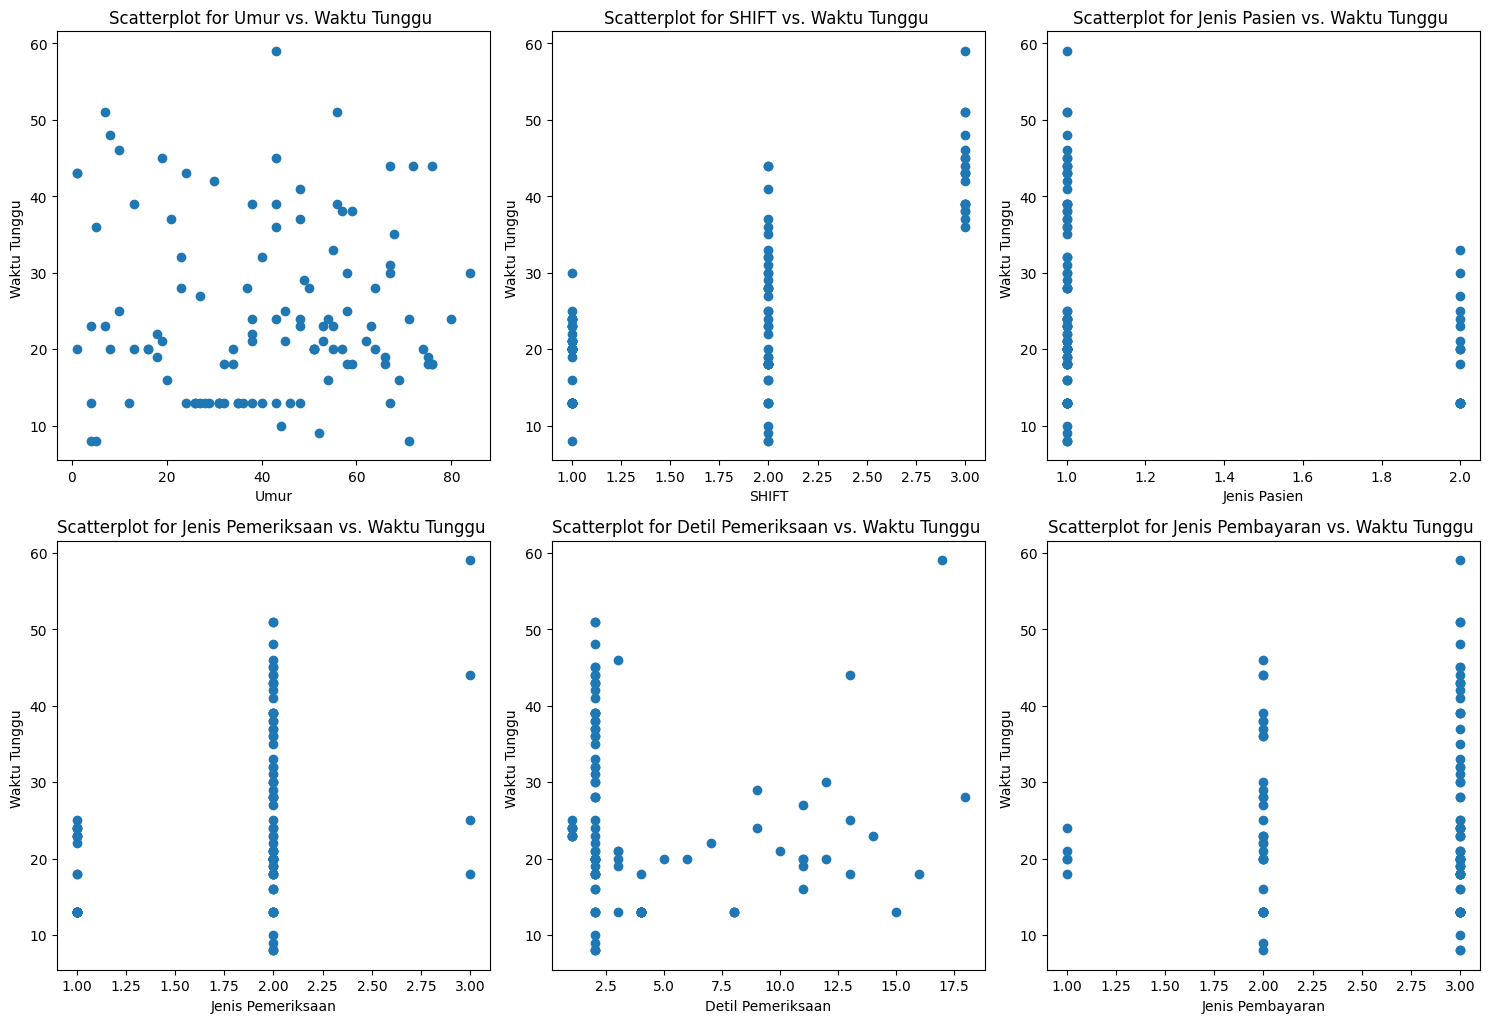

In [9]:
# Define the output variable
output_variable = "Waktu Tunggu "

num_input_variables = len(dataset.columns) - 1
grid_size = int(num_input_variables**0.5) + 1  
fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(15, 15))
axes = axes.flatten()

# Scatterplots for each input variable vs. the output variable
for i, column in enumerate(dataset.columns):
    if column != output_variable:
        ax = axes[i]
        ax.scatter(dataset[column], dataset[output_variable])
        ax.set_title(f"Scatterplot for {column} vs. {output_variable}")
        ax.set_xlabel(column)
        ax.set_ylabel(output_variable)


for i in range(num_input_variables, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Heatmap

<Axes: >

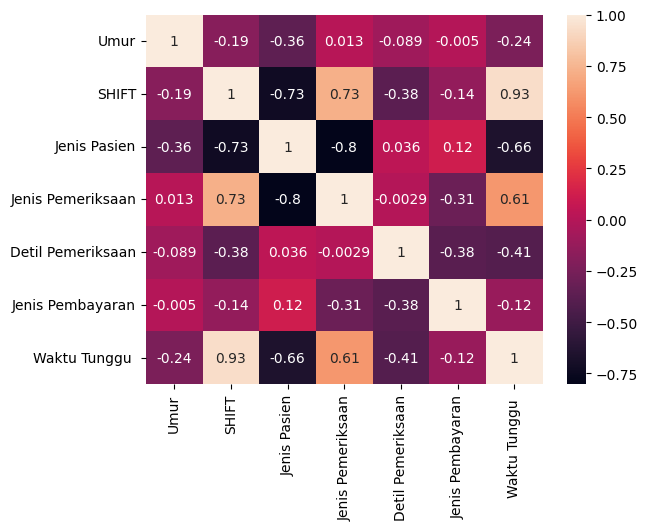

In [10]:
# Visualisasi dengan HeatMap 
dfHeat = dataset
dfHeat = dfHeat.corr()
sns.heatmap(dfHeat.corr(), annot=True)

### Line Graph

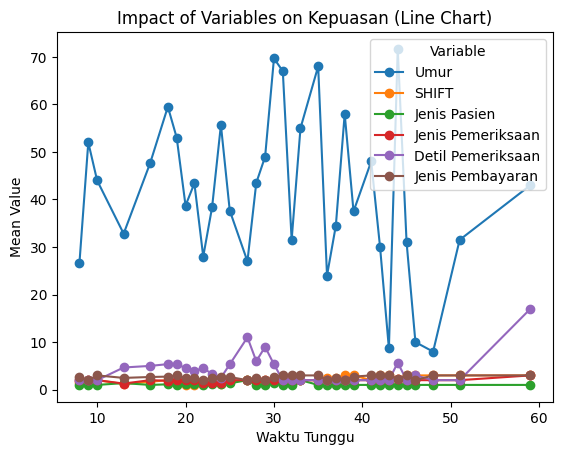

In [11]:
# Create a line chart to compare the impact of variables on "Waktu Tunggu"
data_grouped = dataset.groupby("Waktu Tunggu ").mean()
data_grouped.plot(kind="line", marker="o")
plt.title("Impact of Variables on Kepuasan (Line Chart)")
plt.xlabel("Waktu Tunggu")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Variable")
plt.show() 

### Histogram Average

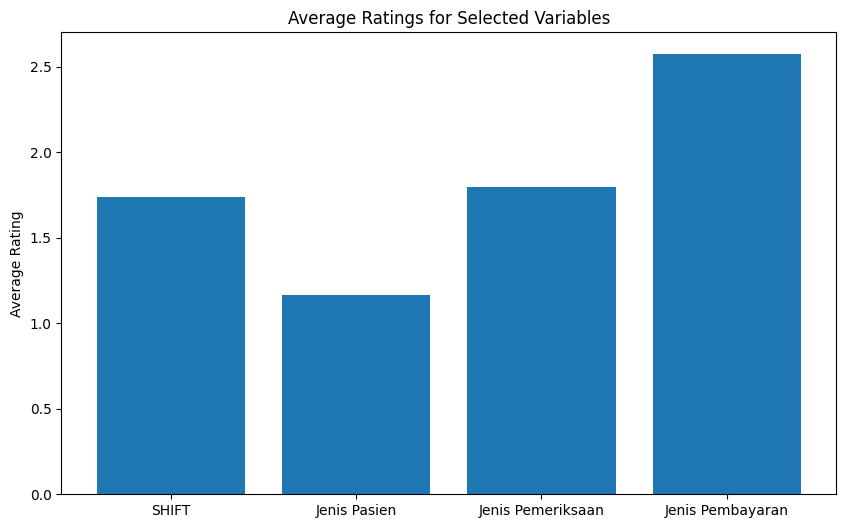

In [12]:
# Select the relevant columns
selected_columns = ["SHIFT", "Jenis Pasien", "Jenis Pemeriksaan", "Jenis Pembayaran", "Waktu Tunggu "]
data = dataset[selected_columns]

# Define a list of labels for the selected variables
labels = selected_columns[:-1]  # Excluding 'kepuasan'

# 2D Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(labels, data.mean()[:-1])
plt.title("Average Ratings for Selected Variables")
plt.ylabel("Average Rating")
plt.show()

### Visualisasi DIagram 2 Dimensi

#### Shift dan Waktu Tunggu

In [13]:
# Menggabungkan data

data_gabungan = {
    'SHIFT': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['SHIFT']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['SHIFT'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

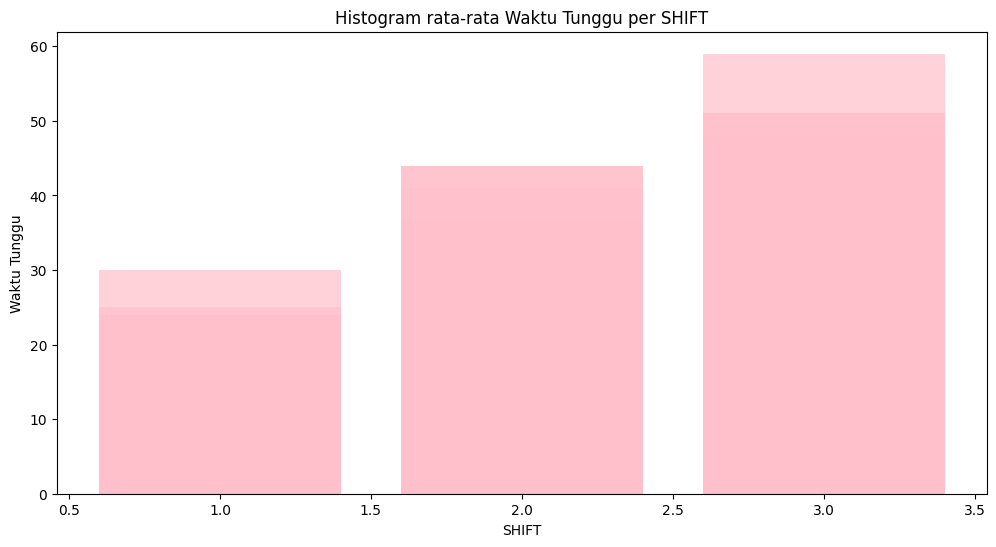

In [14]:
# Membuat histogram dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['SHIFT'], dataset['Waktu Tunggu '], color='pink', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('SHIFT')
plt.ylabel('Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per SHIFT')

plt.show()

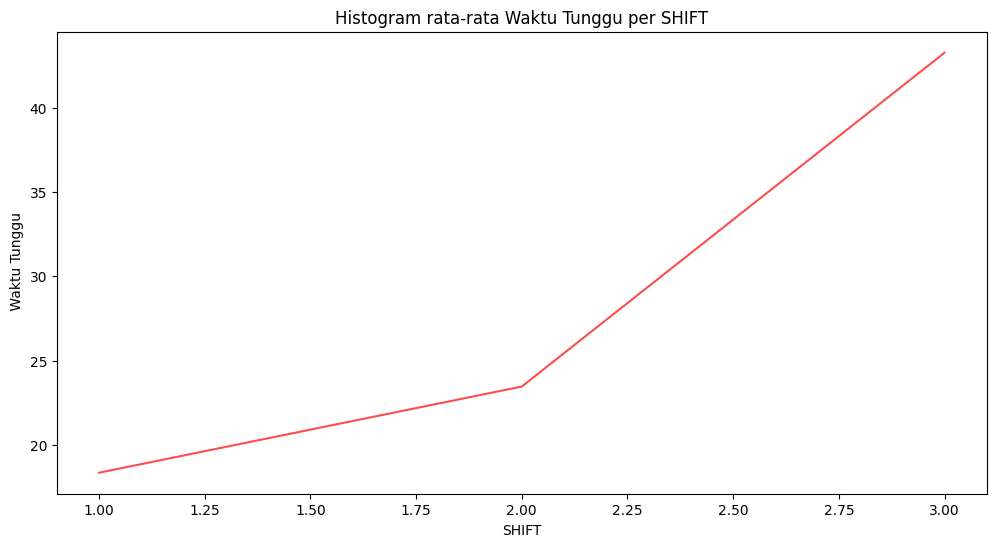

In [15]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['SHIFT'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('SHIFT')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per SHIFT')

plt.show()

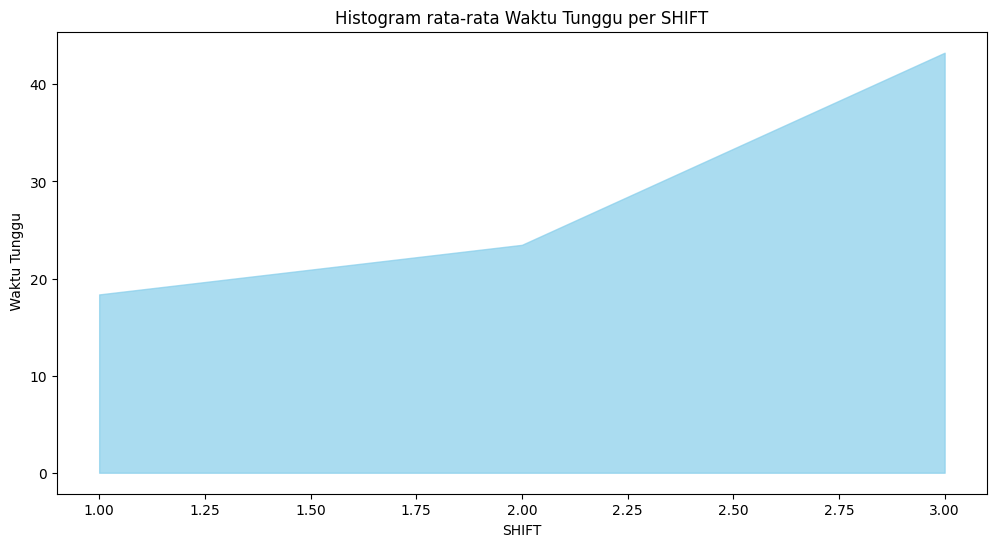

In [16]:
# Membuat diagram area dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['SHIFT'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('SHIFT')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per SHIFT')

plt.show()

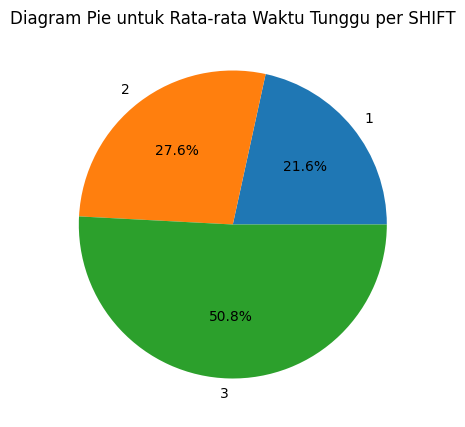

In [17]:
#PIE
data_grouped = dataset.groupby('SHIFT')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan SHIFT yang unik dan rata-rata Waktu tunggu
labels = data_grouped['SHIFT']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per SHIFT')
plt.show()

#### Jenis Pemeriksaan dan Waktu Tunggu

In [18]:
# Gabungan data
data_gabungan = {
    'Jenis Pemeriksaan': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['Jenis Pemeriksaan']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['Jenis Pemeriksaan'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

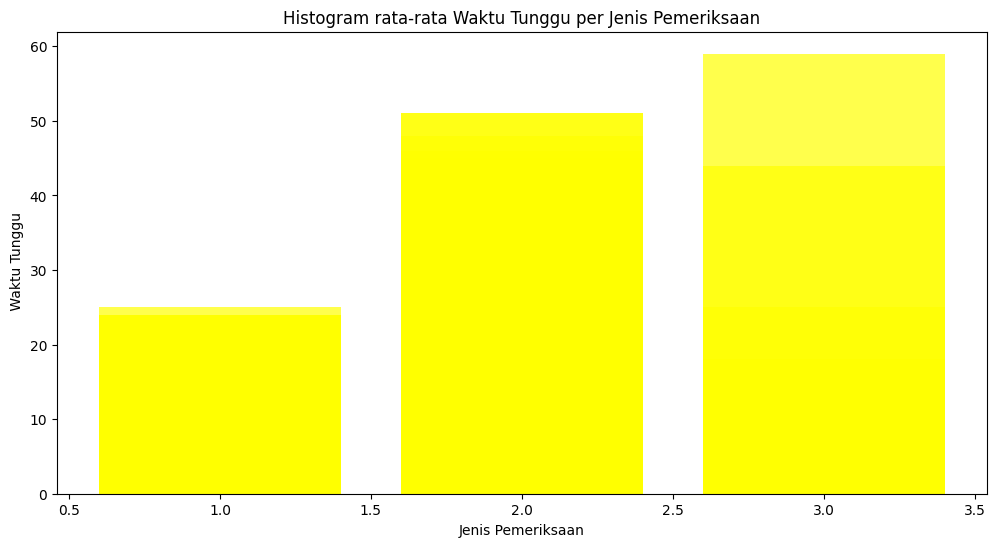

In [19]:
# Membuat histogram dengan Waktuda sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['Jenis Pemeriksaan'], dataset['Waktu Tunggu '], color='yellow', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pemeriksaan')

plt.show()

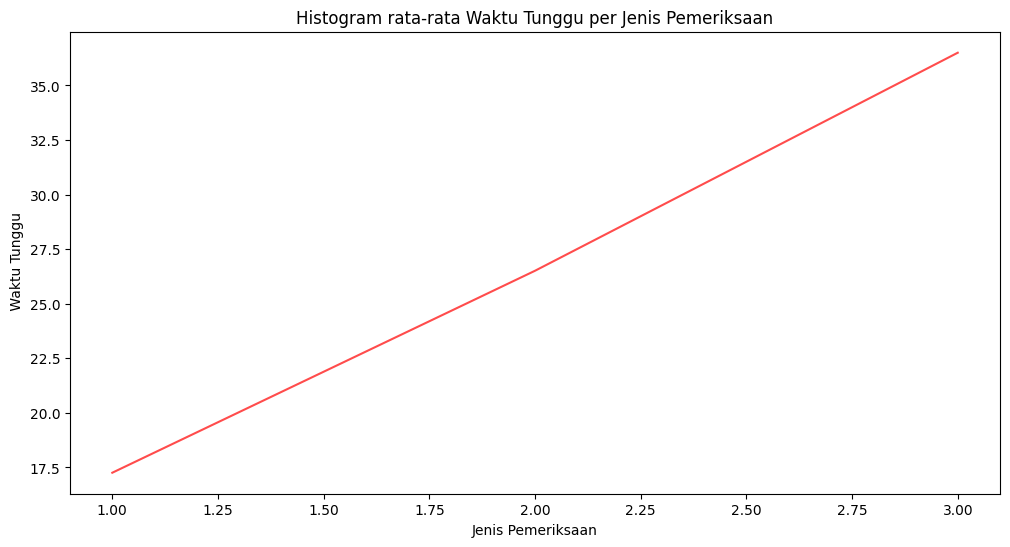

In [20]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['Jenis Pemeriksaan'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pemeriksaan')

plt.show()

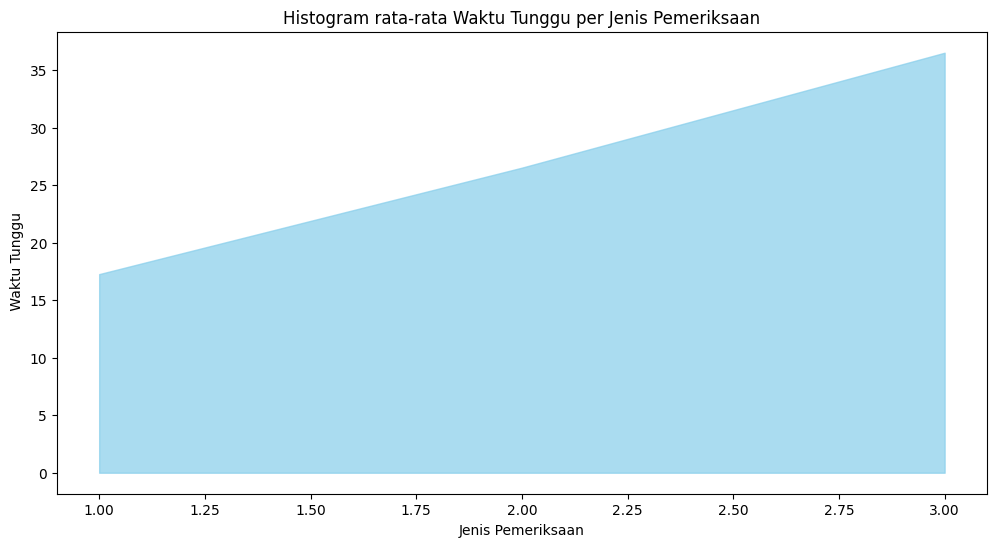

In [21]:
# Membuat diagram area dengan Waktuda sumbu x dan KatWaktunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['Jenis Pemeriksaan'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pemeriksaan')

plt.show()

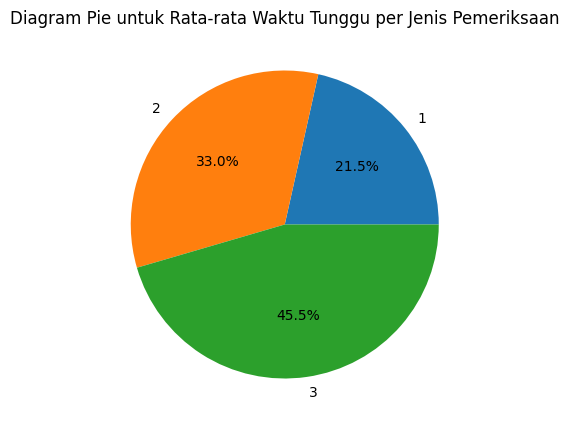

In [22]:
#PIE
data_grouped = dataset.groupby('Jenis Pemeriksaan')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan Jenis Pemeriksaan yang unik dan rata-rata Waktu tunggu
labels = data_grouped['Jenis Pemeriksaan']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per Jenis Pemeriksaan')
plt.show()


#### Jenis Pasien dan Waktu Pemeriksaan

In [23]:
# gabungan data
data_gabungan = {
    'Jenis Pasien': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['Jenis Pasien']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['Jenis Pasien'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

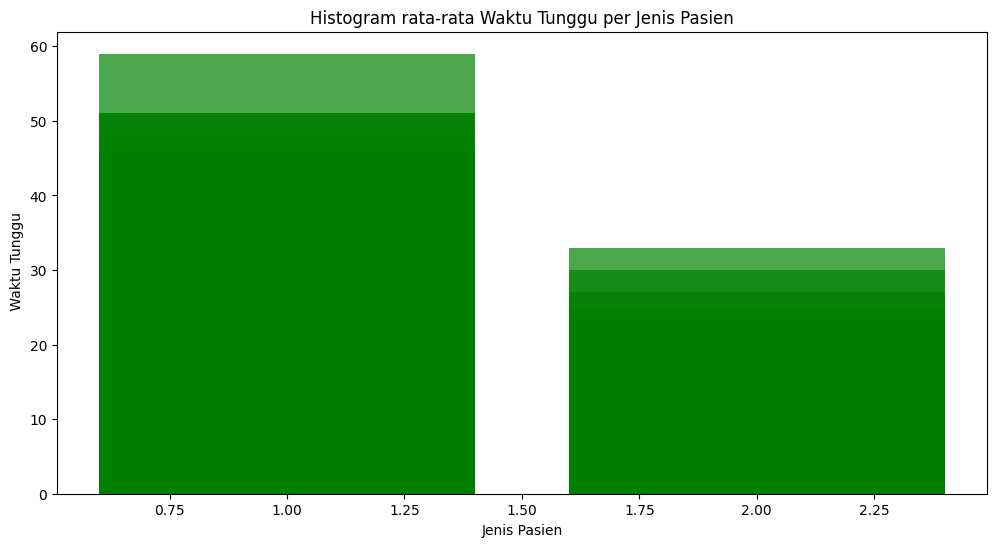

In [24]:
# Membuat histogram dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['Jenis Pasien'], dataset['Waktu Tunggu '], color='green', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pasien')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pasien')

plt.show()

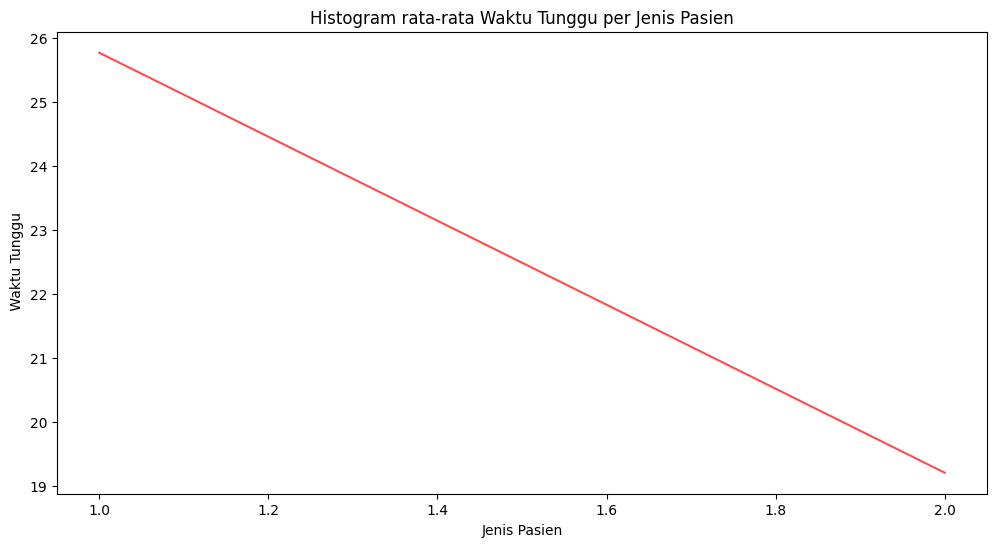

In [25]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['Jenis Pasien'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pasien')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pasien')

plt.show()

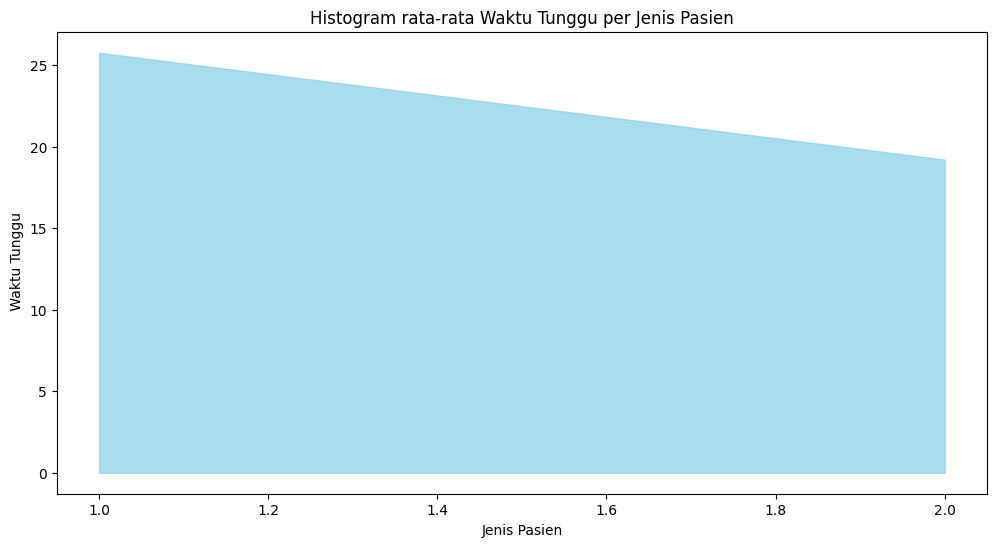

In [26]:
# Membuat diagram area dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['Jenis Pasien'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pasien')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pasien')

plt.show()

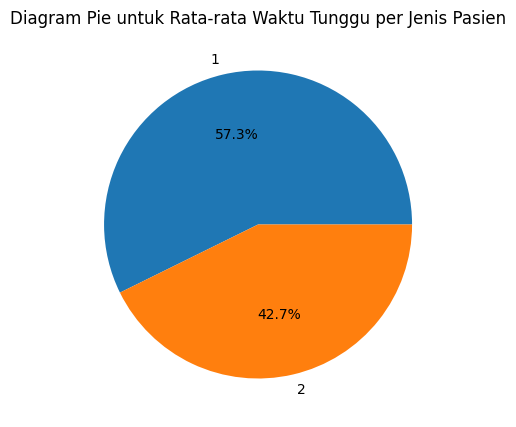

In [27]:
#PIE
data_grouped = dataset.groupby('Jenis Pasien')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan Jenis Pasien yang unik dan rata-rata Waktu tunggu
labels = data_grouped['Jenis Pasien']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per Jenis Pasien')
plt.show()


Detil pemeriksaan dan Waktu Tunggu


In [31]:
# Gabungan data
data_gabungan = {
    'Detil Pemeriksaan': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['Detil Pemeriksaan']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['Detil Pemeriksaan'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

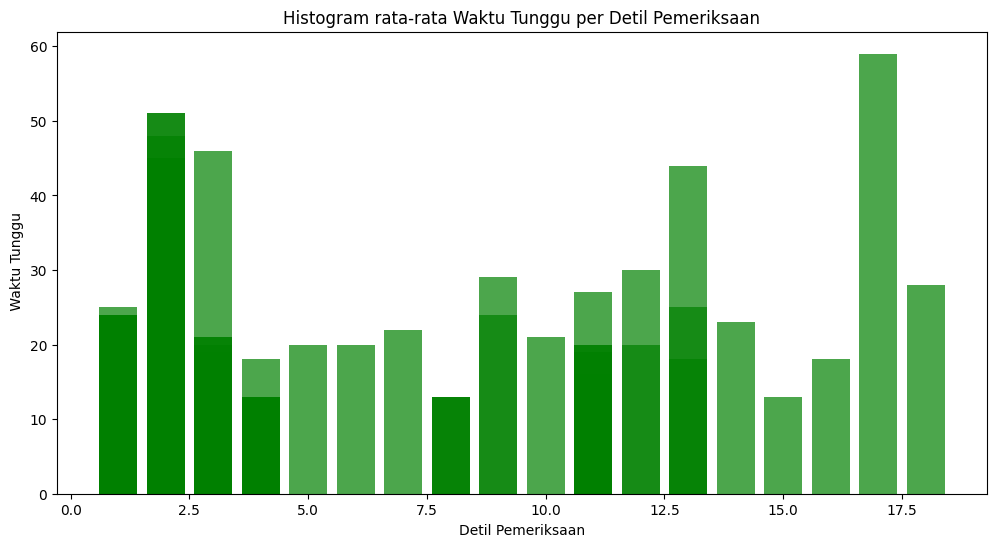

In [32]:
# Membuat histogram dengan Waktuda sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['Detil Pemeriksaan'], dataset['Waktu Tunggu '], color='green', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Detil Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Detil Pemeriksaan')

plt.show()

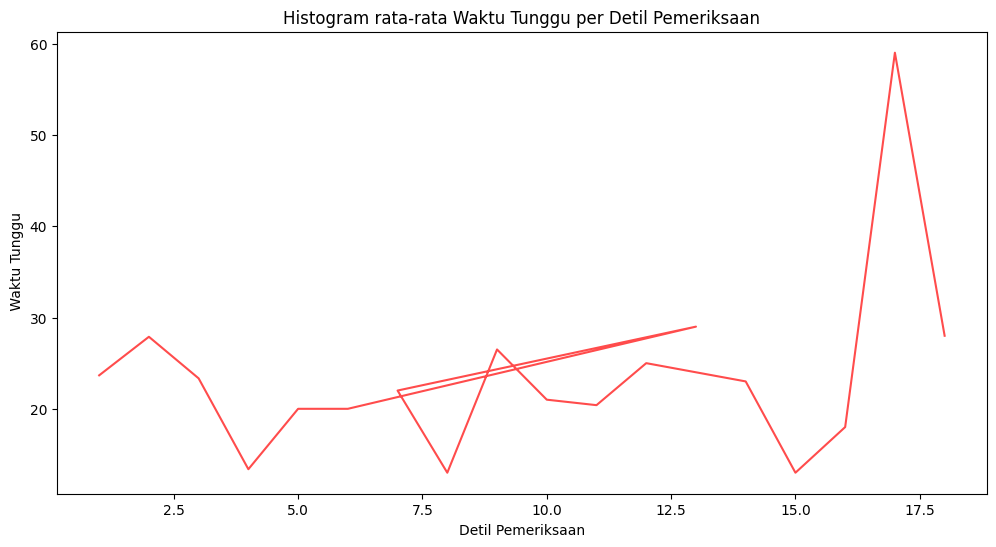

In [33]:
# Line
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['Detil Pemeriksaan'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Detil Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Detil Pemeriksaan')

plt.show()

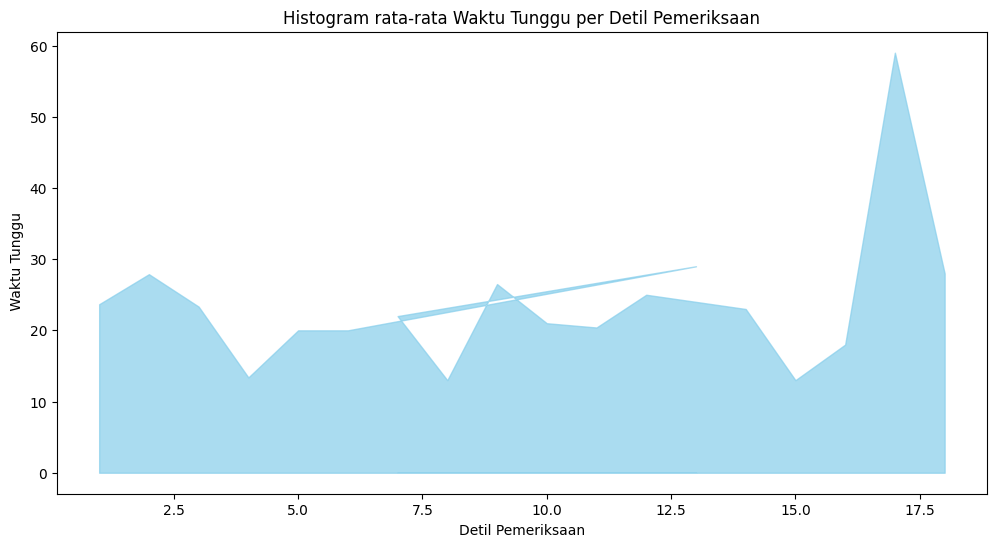

In [35]:
# Area
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['Detil Pemeriksaan'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Detil Pemeriksaan')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Detil Pemeriksaan')

plt.show()

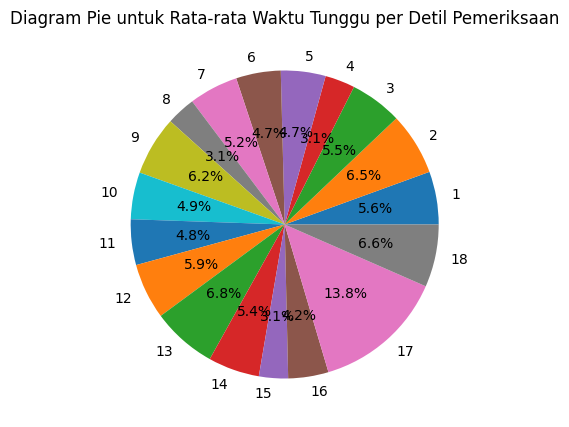

In [36]:
#PIE
data_grouped = dataset.groupby('Detil Pemeriksaan')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan Detil Pemeriksaan yang unik dan rata-rata Waktu tunggu
labels = data_grouped['Detil Pemeriksaan']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per Detil Pemeriksaan')
plt.show()


Jenis Pembayaran dan Waktu Tunggu

In [37]:
# Gabungan data
data_gabungan = {
    'Jenis Pembayaran': [],
    'Waktu Tunggu': []
}

# Pilih dua kolom yang ingin Anda visualisasikan
Waktu_tunggu = dataset['Waktu Tunggu ']
jenis_pemeriksaan = dataset['Jenis Pembayaran']

Waktu = jenis_pemeriksaan.unique()

for Waktu_val in Waktu:
    data_gabungan['Jenis Pembayaran'].append(Waktu_val)
    data_gabungan['Waktu Tunggu'].append(Waktu_tunggu[jenis_pemeriksaan == Waktu_val].mean())

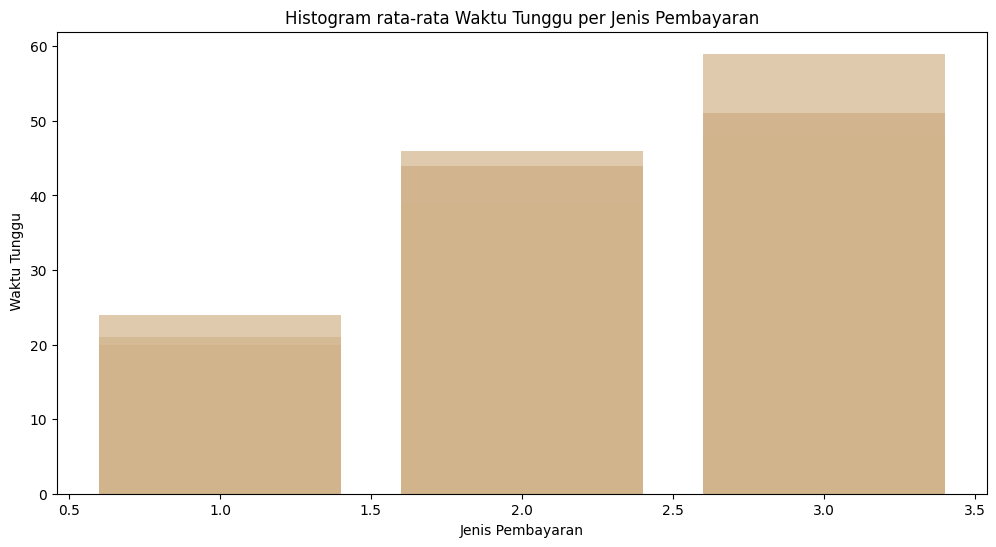

In [38]:
# Membuat histogram dengan Waktuda sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.bar(dataset['Jenis Pembayaran'], dataset['Waktu Tunggu '], color='tan', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pembayaran')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pembayaran')

plt.show()

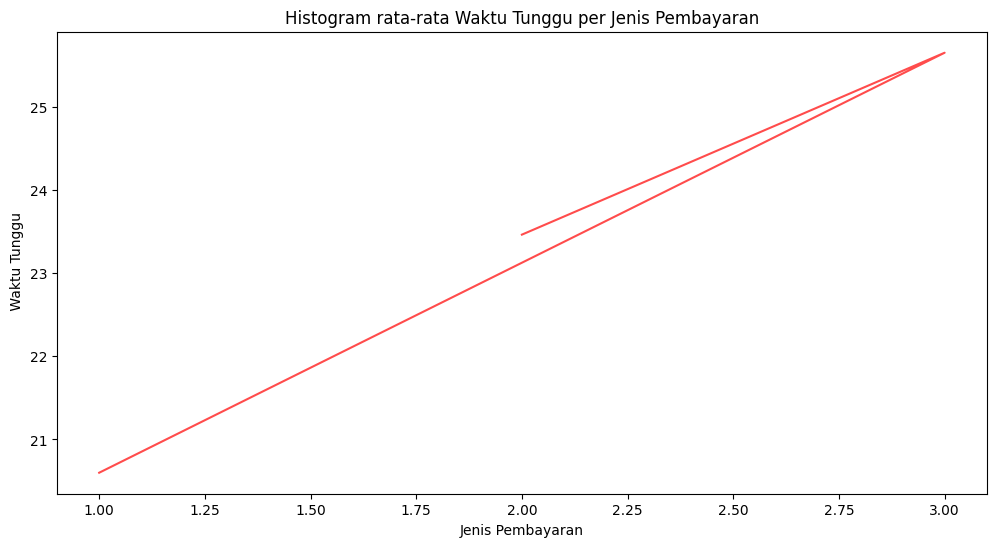

In [39]:
# Membuat diagram garis dengan Waktu pada sumbu x dan Waktu tunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.plot(data_gabungan['Jenis Pembayaran'], data_gabungan['Waktu Tunggu'], color='red', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pembayaran')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pembayaran')

plt.show()

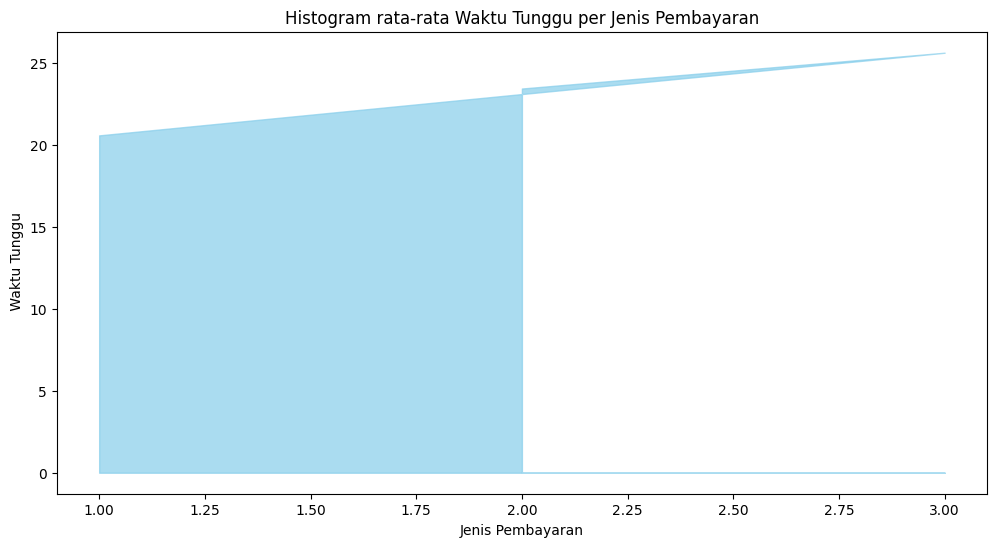

In [40]:
# Membuat diagram area dengan Waktuda sumbu x dan KatWaktunggu pada sumbu y
plt.figure(figsize=(12, 6))
plt.fill_between(data_gabungan['Jenis Pembayaran'], data_gabungan['Waktu Tunggu'], color='skyblue', alpha=0.7)

# Menambahkan label sumbu dan judul
plt.xlabel('Jenis Pembayaran')
plt.ylabel(' Waktu Tunggu')
plt.title('Histogram rata-rata Waktu Tunggu per Jenis Pembayaran')

plt.show()

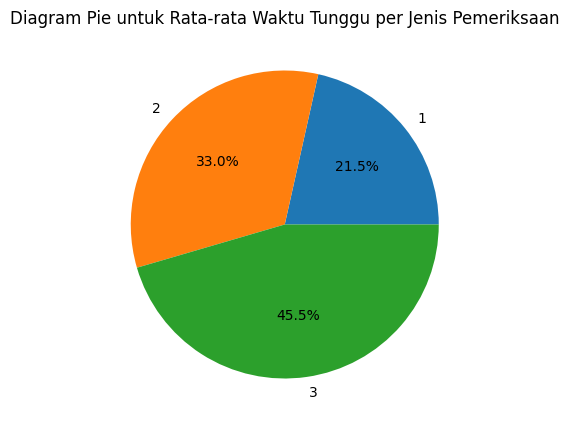

In [41]:
#PIE
data_grouped = dataset.groupby('Jenis Pemeriksaan')['Waktu Tunggu '].mean().reset_index()

# Membuat diagram pie dengan Jenis Pemeriksaan yang unik dan rata-rata Waktu tunggu
labels = data_grouped['Jenis Pemeriksaan']
values = data_grouped['Waktu Tunggu ']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Diagram Pie untuk Rata-rata Waktu Tunggu per Jenis Pemeriksaan')
plt.show()


### Visualisasi High Dimensional

#### Multivariet PIE

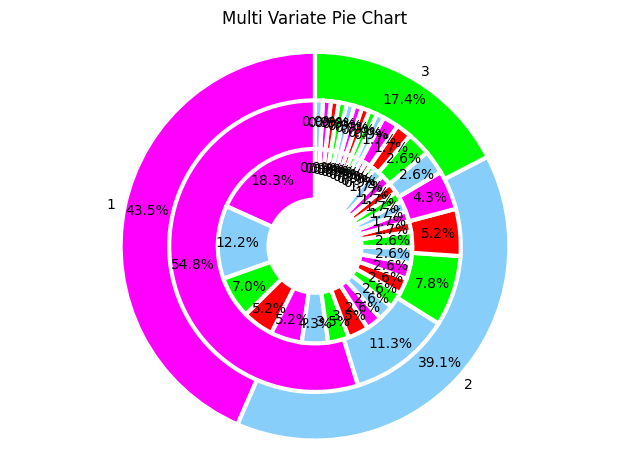

In [76]:
#Multivariet PIE

x1 = dataset["SHIFT"].value_counts()
x2 = dataset["Detil Pemeriksaan"].value_counts()
x3 = dataset["Waktu Tunggu "].value_counts()

colors = ['magenta', 'lightskyblue', 'lime', 'red']

plt.pie(x1, labels=dataset["SHIFT"].value_counts().index,startangle=90, colors=colors, pctdistance=0.88, autopct = '%1.1f%%', radius=1.0, labeldistance=1.05,  wedgeprops = { 'linewidth': 3, 'edgecolor' : "white"}) #draw a first Pie chart
plt.pie(x2, startangle=90, colors=colors,pctdistance=0.85, autopct = '%1.1f%%', radius=0.75,  wedgeprops = { 'linewidth': 3, 'edgecolor': "white"}) #draw a second Pie Chart
plt.pie(x3, startangle=90, pctdistance=0.8, autopct = '%1.1f%%', radius=0.5, colors=colors,  wedgeprops = { 'linewidth': 3, 'edgecolor': "white"}) #draw a third Pie Chart

center_circle = plt.Circle((0,0), 0.25, fc='white', )
plt.title('Multi Variate Pie Chart')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Barplot 3D

In [43]:
# #3D BARPLOT

# # Contoh dataset dengan dua variabel nominal dan satu variabel rasio
# categories_nominal1 = dataset["Waktu Tunggu "].value_counts().index
# categories_nominal2 = dataset["SHIFT"].value_counts().index
# values_ratio = dataset[["Waktu Tunggu ", "SHIFT"]].value_counts().sort_values()

# # Membuat objek subplot 3D
# fig = plt.figure(figsize=(13, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Menentukan posisi untuk setiap grup bar
# bar_positions_x = np.arange(len(categories_nominal1))
# bar_positions_y = np.arange(len(categories_nominal2))
# bar_positions_x, bar_positions_y = np.meshgrid(bar_positions_x, bar_positions_y)

# # Membuat bar chart 3D dengan dua variabel nominal dan satu variabel rasio
# ax.bar3d(bar_positions_x.flatten(), bar_positions_y.flatten(), np.zeros_like(bar_positions_x).flatten(),
#          dx=0.8, dy=0.8, dz=values_ratio * len(categories_nominal1), color='blue')

# # Menambahkan label sumbu dan judul
# ax.set_xlabel('Waktu Tunggu')
# ax.set_ylabel('SHIFT')
# ax.set_zlabel('Count')
# ax.set_title('3D Bar Chart Jenis Pemeriksaan dan SHIFT')

# # Menambahkan label untuk setiap grup
# ax.set_xticks(np.arange(len(categories_nominal1)) + 0.4)
# ax.set_xticklabels(categories_nominal1)
# ax.set_yticks(np.arange(len(categories_nominal2)) + 0.4)
# ax.set_yticklabels(categories_nominal2)

# # Menampilkan plot
# plt.show()

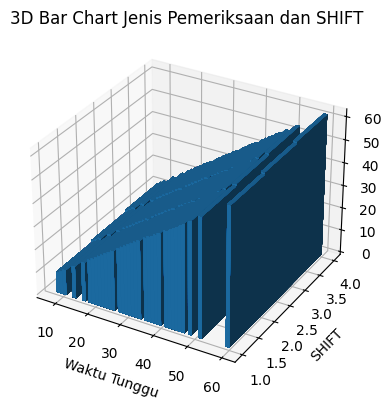

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121, projection='3d')

# data
_x = dataset["Waktu Tunggu "]
_y = dataset["SHIFT"]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1


ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
# Menambahkan label sumbu dan judul
ax1.set_xlabel('Waktu Tunggu')
ax1.set_ylabel('SHIFT')
ax1.set_zlabel('Count')
ax1.set_title('3D Bar Chart Waktu Tunggu dan SHIFT')


plt.show()

#### Scatterplot 3D

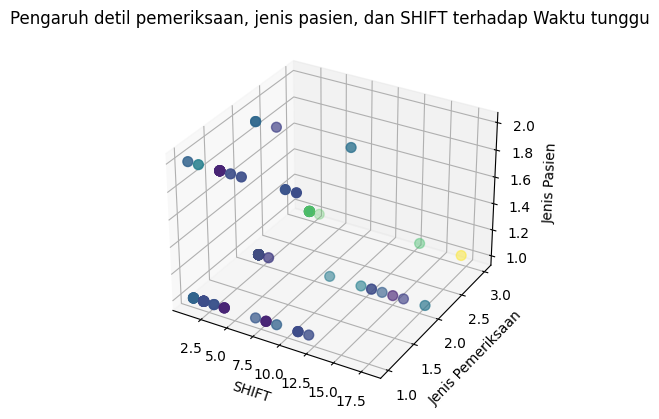

In [73]:
#3D SCATTER PLOT

#Scatter Plot 3D


x = dataset['Detil Pemeriksaan']
y = dataset['SHIFT']
kt = dataset['Waktu Tunggu ']
z = dataset['Jenis Pasien']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x,y,z,
c = kt, s=50
)

# # Tambahkan penjelasan
# handles = [plt.Line2D([0], [0], marker='o', color=color, label=f'Waktu Tunggu {kt}') for kt, color in colors.items()]
# ax.legend(handles=handles, title='Waktu Tunggu')

ax.set_xlabel("SHIFT")
ax.set_ylabel("Jenis Pemeriksaan")
ax.set_zlabel("Jenis Pasien")
ax.set_title("Pengaruh detil pemeriksaan, jenis pasien, dan SHIFT terhadap Waktu tunggu")

plt.show()